In [1]:
import json
import urllib2
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sb
from datetime import datetime

/Users/David/Desktop/Jobs/GlobalFishingWatch/github/vessel-maps/utilities/pipa_paper/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/David/Desktop/Jobs/GlobalFishingWatch/github/vessel-maps/utilities/pipa_paper/venv/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
command = "python download_results.py id_fishing_points_4_dal"
os.system(command)

0

In [3]:
url = 'http://crowd.globalfishingwatch.org/api/user?limit=100'
response = urllib2.urlopen(url)
input_data = json.loads(response.read())

names = {}
for i in range(1,len(input_data)+1):
    k = input_data[i-1]
    names[i] = k['name']

In [4]:

task_ids = []
with open('id_fishing_points_4_dal_tasks.json') as data_file:    
    data = json.load(data_file)
    for d in data:
        task_ids.append(d['id'])


In [5]:

people = {}
with open('id_fishing_points_4_dal_task_runs.json') as data_file:    
    data = json.load(data_file)
    for d in data:
#         print d
#         print d['task_id'], names[d['user_id']]
        p =  names[d['user_id']]
        t = d['finish_time']
        t = t.split("T")[0]
        t = datetime.strptime(t,'%Y-%m-%d')
#         print t < datetime(2016,10,9)
        if p not in people:
            people[p]=0
        people[p]+=1
#         print d
#         break


In [6]:
people

{u'JulieCharbonneau': 51,
 u'ciarawillis': 17,
 u'elizabethnagel': 12,
 u'katepepler': 55,
 u'kristinaboerder': 10,
 u'stephanielewis': 2}

/Users/David/Desktop/Jobs/GlobalFishingWatch/github/vessel-maps/utilities/pipa_paper/venv/lib/python2.7/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


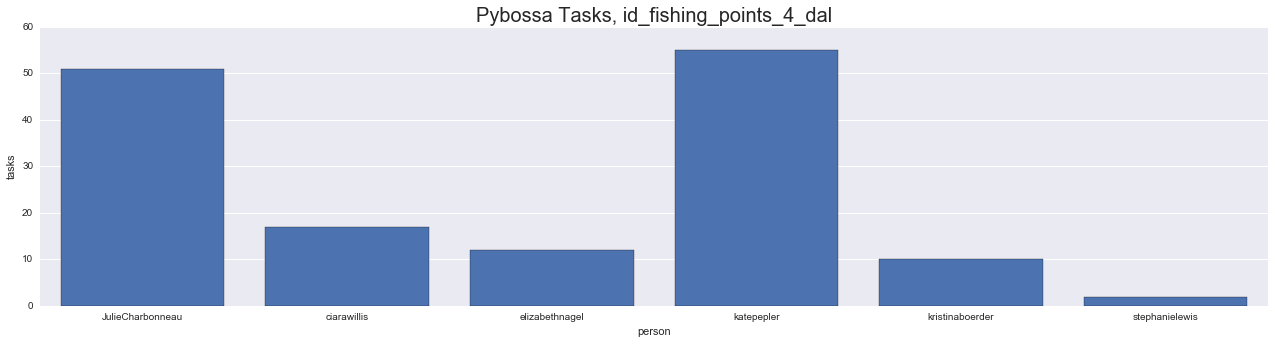

In [7]:
x = []
y = []

for p in people:
    x.append(p)
    y.append(people[p])

df = pd.DataFrame(people.items(), columns=['person', 'tasks'])    

plt.figure(figsize=(22, 5))  
sb.barplot(x="person", y="tasks" ,data= df )
plt.title("Pybossa Tasks, id_fishing_points_4_dal", fontsize = "20")

In [8]:
df['tasks'].sum()

147